# **202002961** 김현주

## 영화 제목을 맞히는 분류기(classifier) 학습시키기

# **① 전체적인 (②~⑤에 대한) 요약/개요 작성하기**

**② 데이터 처리하기**

- 데이터를 살펴본 뒤, 75:25 비율로 훈련 세트와 테스트 세트로 나누어 주었습니다. 이후 Tokenizer로 okt.nouns와 Vectorizer로 TF-IDF를 적용하여 훈련 세트와 테스트 세트를 tfidf vector로 변환하였습니다.

**③ 분류기 3개 이상 성능 비교하기**

- 7개의 분류기(나이브 베이즈, 로지스틱 회귀, 라쏘 회귀, 릿지 회귀, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅)의 성능을 비교했습니다.

**④ Tokenizer 및 Vectorizer를 변경하여 3개 이상 성능 비교하기**

- 주로 Tokenizer를 변경하여 성능을 비교하였습니다. Okt를 이용해 okt.morphs와 명사, 동사, 형용사만을 반환하는 my_tokenizer_okt를 사용했고, Komoran을 이용해 k.morphs, k.nouns와 고유명사, 일반명사, 대명사, 수사, 동사, 형용사만을 반환하는 my_tokenizer_k를 적용하여 성능을 평가했습니다.

**⑤ (③과 ④에서의) 가장 성능이 좋은 모델(Model N)의 벡터를 t-SNE로 시각화하기**

- ③과 ④에서 가장 성능이 좋았던 Tokenizer인 k.morphs와 Vectorizer인 TF-IDF를 사용한 벡터를 t-SNE로 시각화하였습니다. 또한, PCA 벡터를 사용하여 한번 더 t-SNE로 시각화해보았습니다.


#  **② 데이터 처리하기**

먼저 데이터의 형태를 확인한 후 데이터를 75:25 비율로 훈련 세트와 테스트 세트로 분리하였습니다. 그리고 지금까지의 수업에서 자주 사용한 okt.nouns(주어진 텍스트를 형태소 단위로 분리하고 명사만 반환)를 이용한 Tokenizer와, TF-IDF를 사용한 Vectorizer를 기본 분류기 설정으로 활용했습니다.

In [1]:
import pandas as pd
df = pd.read_csv('./daum_movie_review.csv')
df.head(3) # 데이터 살펴보기

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워


In [2]:
df.title.value_counts() # 7개의 영화로 되어있음을 확인

,count
title,
신과함께,4947
택시운전사,2322
인피니티 워,2042
범죄도시,1939
곤지암,1547
라라랜드,1150
코코,778


In [3]:
df.shape # 데이터 크기 확인

(14725, 4)

In [4]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
# 비율(test_size)을 지정하지 않으면 75:25로 분할됨
X_train, X_test, y_train, y_test = train_test_split(df.review, df.title, random_state=0)

print('#Train set size:', len(X_train)) # 실제로 몇개의 특성이 사용되었는지 확인
print('#Test set size:', len(X_test))

#Train set size: 11043
#Test set size: 3682


In [5]:
! pip install konlpy

In [6]:
from konlpy.tag import Okt # konlpy에서 Twitter 형태소 분석기를 import

okt = Okt()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 방식
# tokenizer로 okt.nouns(형태소 단위로 분리해서 명사만 반환)를 사용
# feature의 개수는 2000개를 사용
# min_df 파라미터를 이용해 문서에서 5개 이하로 나온 단어 무시
# max_df 파라미터를 이용해 문서에서 50% 이상 나온 단어 무시
tfidf = TfidfVectorizer(tokenizer=okt.nouns, max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf = tfidf.fit_transform(X_train) # train set을 tfidf vector로 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환 tfidf vector로 변환

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# **③ 분류기 3개 이상 성능 비교하기**

– 본인이 선택한 분류기 3가지(이상)은 무엇이며, 선택한 이유를 설명:

4주차 수업에서 배운 모든 종류의 7개 분류기(나이브 베이즈, 로지스틱 회귀, 라쏘 회귀, 릿지 회귀, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅)들을 사용하여 영어가 아닌 한국어에 대한 성능이 궁금하여 비교해 보았습니다.

**(Model 1)** 분류기 : **나이브 베이즈**, Tokenizer : okt.nouns, Vectorizer : TF-IDF

In [8]:
from sklearn.naive_bayes import MultinomialNB # sklearn이 제공하는 MultinomialNB 를 사용
NB_clf = MultinomialNB() # 분류기 선언

NB_clf.fit(X_train_tfidf, y_train) # train set을 이용하여 분류기(classifier)를 학습

print('Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train))) # train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test))) # test set에 대한 예측정확도를 확인

Train set score: 0.708
Test set score: 0.672


**(Model 2)** 분류기 : **로지스틱 회귀**, Tokenizer : okt.nouns, Vectorizer : TF-IDF

In [9]:
from sklearn.linear_model import LogisticRegression # sklearn이 제공하는 LogisticRegression을 사용

LR_clf = LogisticRegression() # 로지스틱 회귀 분류기 선언
LR_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습

print('Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도
print('Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.756
Test set score: 0.694


**(Model 3)** 분류기 : **라쏘 회귀**, Tokenizer : okt.nouns, Vectorizer : TF-IDF

In [10]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습

print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.721
Test set score: 0.692


**(Model 4)** 분류기 : **릿지 회귀**, Tokenizer : okt.nouns, Vectorizer : TF-IDF

In [11]:
from sklearn.linear_model import RidgeClassifier # sklearn이 제공하는 RidgeClassifier을 사용

ridge_clf = RidgeClassifier() # 릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.779
Test set score: 0.691


**(Model 5)** 분류기 : **결정 트리**, Tokenizer : okt.nouns, Vectorizer : TF-IDF

In [12]:
from sklearn.tree import DecisionTreeClassifier # sklearn이 제공하는 DecisionTreeClassifier을 사용

tree = DecisionTreeClassifier(random_state=7) # 결정 트리 분류기 선언
tree.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습

print('#Decision Tree train set score: {:.3f}'.format(tree.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도
print('#Decision Tree test set score: {:.3f}'.format(tree.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

#Decision Tree train set score: 0.912
#Decision Tree test set score: 0.603


**(Model 6)**  분류기 : **랜덤 포레스트**, Tokenizer : okt.nouns, Vectorizer : TF-IDF

In [13]:
from sklearn.ensemble import RandomForestClassifier # sklearn이 제공하는 RandomForestClassifier을 사용

forest = RandomForestClassifier(random_state=7) # 랜덤 포레스트 분류기 선언
forest.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습

print('#Random Forest train set score: {:.3f}'.format(forest.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도
print('#Random Forest test set score: {:.3f}'.format(forest.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

#Random Forest train set score: 0.912
#Random Forest test set score: 0.667


**(Model 7)** 분류기 : **그래디언트 부스팅**, Tokenizer : okt.nouns, Vectorizer : TF-IDF

In [14]:
from sklearn.ensemble import GradientBoostingClassifier # sklearn이 제공하는 GradientBoostingClassifier을 사용

gb = GradientBoostingClassifier(random_state=7) # 그래디언트 부스팅 분류기 선언
gb.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습

print('train set score: {:.3f}'.format(gb.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도
print('test set score: {:.3f}'.format(gb.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

train set score: 0.704
test set score: 0.663


(Model 1) 분류기 : **나이브 베이즈**, Tokenizer : okt.nouns, Vectorizer : TF-IDF => Train score : 0.708 / Test score : 0.672

(Model 2) 분류기 : **로지스틱 회귀**, Tokenizer : okt.nouns, Vectorizer : TF-IDF => Train score : 0.756 / Test score : 0.694

(Model 3) 분류기 : **라쏘 회귀**, Tokenizer : okt.nouns, Vectorizer : TF-IDF => Train score : 0.721 / Test score : 0.692

(Model 4) 분류기 : **릿지 회귀**, Tokenizer : okt.nouns, Vectorizer : TF-IDF => Train score : 0.779 / Test score: 0.691

(Model 5) 분류기 : **결정 트리**, Tokenizer : okt.nouns, Vectorizer : TF-IDF => Train score: 0.912 / Test score: 0.603

(Model 6) 분류기 : **랜덤 포레스트**, Tokenizer : okt.nouns, Vectorizer : TF-IDF => Train score : 0.912 / Test score: 0.667

(Model 7) 분류기 : **그래디언트 부스팅**, Tokenizer : okt.nouns, Vectorizer : TF-IDF => Train score : 0.704 / Test score: 0.663

– 결과에 대한 해석 :

로지스틱 회귀를 사용한 분류기(Model 2)와 라쏘 회귀를 사용한 분류기(Model 3)는 테스트 세트에서 비슷하게 좋은 성능을 보였습니다. 그러나 라쏘 회귀를 사용한 분류기(Model 3)의 경우가 훈련 세트와 테스트 세트 간의 성능 차이가 크지 않아 과적합에 대한 우려가 적으므로 일반화 능력이 더 뛰어나다고 생각합니다.

결정 트리(Model 5)와 랜덤 포레스트(Model 6)를 이용한 분류기는 훈련 데이터에 과적합되어 훈련 데이터에 비해 테스트 데이터에서 성능이 많이 떨어진 모습을 볼 수 있습니다.

# **④ Tokenizer 및 Vectorizer를 변경하여 3개 이상 성능 비교하기**

– 본인이 선택한 Tokenizer 및 Vectorizer와 사용한 매개변수에 대해서, 어떤 것을 사용했으며 그 이유는
무엇인지 설명:

Komoran과 Okt를 활용한 Tokenizer의 성능 차이에 대해 궁금했으며, 위에서 주어진 텍스트를 형태소 단위로 분리하고 명사만 반환하는 okt.nouns를 사용하는 Tokenizer보다 다른 품사도 포함할 수 있는 Tokenizer를 사용하면 성능을 좀 더 높일 수 있다고 생각하여 아래의 Tokenizer를 사용해 보았습니다.

- okt.morphs : Okt를 활용하여 주어진 텍스트를 형태소 단위로 분리
- my_tokenizer_okt : Okt를 활용하여 주어진 텍스트에서 형태소 단위로 분할 후 명사, 동사, 형용사만 반환
- k.morphs : Java로 개발된 한국어 형태소 분석기인 Komoran을 활용하여 주어진 텍스트를 형태소 단위로 분리
-  k.nouns : Komoran을 활용하여 주어진 텍스트를 형태소 단위로 분리한 후 명사만 반환
- my_tokenizer_k : Komoran을 활용하여 고유명사(NNP), 일반명사(NNG), 대명사(NP), 수사(NR), 동사(VV), 형용사(VA)만을 반환

위에서 분류기 성능을 비교한 결과, (Model 3) 라쏘 회귀를 사용한 분류기가 가장 좋은 성능을 보인다고 판단하여 아래의 5개 모델은 모두 라쏘 회귀를 분류기로 사용하여 성능을 비교하였습니다.

**(Model 8)** 분류기 : 라쏘 회귀, Tokenizer : **okt.morphs**, Vectorizer : TF-IDF

In [15]:
# TF-IDF 방식
# tokenizer로 okt.morphs(주어진 텍스트를 형태소 단위로 분리)를 사용
# feature의 개수는 2000개를 사용
# min_df 파라미터를 이용해 문서에서 5개 이하로 나온 단어 무시
# max_df 파라미터를 이용해 문서에서 50% 이상 나온 단어 무시
tfidf_morphs = TfidfVectorizer(tokenizer=okt.morphs, max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf_morphs = tfidf_morphs.fit_transform(X_train) # train set을 tfidf vector로 변환
X_test_tfidf_morphs = tfidf_morphs.transform(X_test) # test set을 tfidf vector로 변환

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf_morphs, y_train) # train data를 이용하여 분류기를 학습

print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf_morphs, y_train))) # train data에 대한 예측정확도
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf_morphs, y_test))) # test data에 대한 예측정확도

Train set score: 0.738
Test set score: 0.703


**(Model 9)** 분류기 : 라쏘 회귀, Tokenizer : **my_tokenizer_okt**, Vectorizer : TF-IDF

In [17]:
# my_tokenizer_okt : Okt를 활용하여 주어진 텍스트에서 형태소 단위로 분할 후 명사, 동사, 형용사만 반환
def my_tokenizer_okt(doc):
    return [token for token, pos in okt.pos(doc) if pos in ['Noun', 'Verb', 'Adjective']]

# TF-IDF 방식
# tokenizer로 my_tokenizer_one를 사용
# feature의 개수는 2000개를 사용
# min_df 파라미터를 이용해 문서에서 5개 이하로 나온 단어 무시
# max_df 파라미터를 이용해 문서에서 50% 이상 나온 단어 무시
tfidf_okt = TfidfVectorizer(tokenizer=my_tokenizer_okt, max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf_okt = tfidf_okt.fit_transform(X_train) # train set을 tfidf vector로 변환
X_test_tfidf_okt = tfidf_okt.transform(X_test) # test set을 tfidf vector로 변환

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf_okt, y_train) # train data를 이용하여 분류기를 학습

print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf_okt, y_train))) # train data에 대한 예측정확도
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf_okt, y_test))) # test data에 대한 예측정확도

Train set score: 0.734
Test set score: 0.702


**(Model 10)** 분류기 : 라쏘 회귀, Tokenizer : **k.morphs**, Vectorizer : TF-IDF

In [19]:
from konlpy.tag import Komoran
k = Komoran() # Java로 개발된 한국어 형태소 분석기

# TF-IDF 방식
# tokenizer로 k.morphs(Komoran을 활용하여 주어진 텍스트를 형태소 단위로 분할)을 사용
# feature의 개수는 2000개를 사용
# min_df 파라미터를 이용해 문서에서 5개 이하로 나온 단어 무시
# max_df 파라미터를 이용해 문서에서 50% 이상 나온 단어 무시
tfidf_k_morphs = TfidfVectorizer(tokenizer=k.morphs, max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf_k_morphs = tfidf_k_morphs.fit_transform(X_train) # train set을 tfidf vector로 변환
X_test_tfidf_k_morphs = tfidf_k_morphs.transform(X_test) # test set을 tfidf vector로 변환

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf_k_morphs, y_train) # train data를 이용하여 분류기를 학습

print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf_k_morphs, y_train))) # train data에 대한 예측정확도
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf_k_morphs, y_test))) # test data에 대한 예측정확도

Train set score: 0.745
Test set score: 0.720


**(Model 11)** 분류기 : 라쏘 회귀, Tokenizer : **k.nouns**, Vectorizer : TF-IDF

In [21]:
# TF-IDF 방식
# tokenizer로 k.nouns(Komoran을 사용하여 주어진 텍스트를 형태소 단위로 분리 후 명사만 반환)
# feature의 개수는 2000개를 사용
# min_df 파라미터를 이용해 문서에서 5개 이하로 나온 단어 무시
# max_df 파라미터를 이용해 문서에서 50% 이상 나온 단어 무시
tfidf_nouns = TfidfVectorizer(tokenizer=k.nouns, max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf_nouns = tfidf_nouns.fit_transform(X_train) # train set을 tfidf vector로 변환
X_test_tfidf_nouns = tfidf_nouns.transform(X_test) # test set을 tfidf vector로 변환

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf_nouns, y_train) # train data를 이용하여 분류기를 학습

print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf_nouns, y_train))) # train data에 대한 예측정확도
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf_nouns, y_test))) # test data에 대한 예측정확도

Train set score: 0.713
Test set score: 0.691


**(Model 12)** 분류기 : 라쏘 회귀, Tokenizer : **my_tokenzier_k**, Vectorizer : TF-IDF

In [23]:
# my_tokenizer_k : Komoran을 활용하여 주어진 텍스트를 형태소 단위로 분할하고
# 고유명사(NNP), 일반명사(NNG), 대명사(NP), 수사(NR), 동사(VV), 형용사(VA)만을 반환
def my_tokenizer_k(doc):
    return [token for token, pos in k.pos(doc) if pos in ['NNP', 'NNG', 'NP', 'NR', 'VV', 'VA']]

# TF-IDF 방식
# tokenizer로 my_tokenizer_k을 사용
# feature의 개수는 2000개를 사용
# min_df 파라미터를 이용해 문서에서 5개 이하로 나온 단어 무시
# max_df 파라미터를 이용해 문서에서 50% 이상 나온 단어 무시
tfidf_k = TfidfVectorizer(tokenizer=my_tokenizer_k, max_features=2000, min_df=5, max_df=0.5)

X_train_tfidf_k = tfidf_k.fit_transform(X_train) # train set을 tfidf vector로 변환
X_test_tfidf_k = tfidf_k.transform(X_test) # test set을 tfidf vector로 변환

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1) # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf_k, y_train) # train data를 이용하여 분류기를 학습

print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf_k, y_train))) # train data에 대한 예측정확도
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf_k, y_test))) # test data에 대한 예측정확도

Train set score: 0.731
Test set score: 0.703


(Model 3) 분류기 : 라쏘 회귀, Tokenizer : **okt.nouns**, Vectorizer : TF-IDF => Train score : 0.721 / Test score : 0.692

(Model 8) 분류기 : 라쏘 회귀, Tokenizer : **okt.morphs**, Vectorizer : TF-IDF
 => Train score: 0.738 / Test score: 0.703


(Model 9) 분류기 : 라쏘 회귀, Tokenizer : **my_tokenizer_okt**, Vectorizer : TF-IDF => Train score: 0.734 / Test score: 0.702

(Model 10) 분류기 : 라쏘 회귀, Tokenizer : **k.morphs**, Vectorizer : TF-IDF => Train score: 0.745 / Test score: 0.720

(Model 11) 분류기 : 라쏘 회귀, Tokenizer : **k.nouns**, Vectorizer : TF-IDF => Train score: 0.713 / Test score: 0.691

(Model 12) 분류기 : 라쏘 회귀, Tokenizer : **my_tokenzier_k**, Vectorizer : TF-IDF => Train score: 0.731 / Test score: 0.703

– 결과에 대한 해석 :

명사만 사용한 경우(Model 3, Model 11)보다 다양한 품사를 포함한 경우(Model 8, Model 9, Model 10, Model 12)의 성능이 전반적으로 더 우수했습니다.

Komoran을 활용해 형태소 단위로 분할하는 Vectorizer(Model 10)를 사용한 분류기가 가장 높은 성능을 보였으며, 이는 명사만이 아닌 다양한 품사들 또한 반환함으로써 모델이 더 많은 텍스트 정보를 활용할 수 있었기 때문입니다.

# **⑤ (③과 ④에서의) 가장 성능이 좋은 모델(Model N)의 벡터를 t-SNE로 시각화하기**

위에서 가장 성능이 좋은 Tokenizer : k.morphs, Vectorizer : TF-IDF인 벡터를 t-SNE로 시각화해보겠습니다.

In [25]:
# 원래 tfidf 벡터 차원 확인
print('Original tfidf matrix shape:', X_train_tfidf_k.shape)

Original tfidf matrix shape: (11043, 2000)


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=7, init="random") #시각화를 위해 t-SNE를 이용해 2차원으로 축소
tsne_tfidf = tsne.fit_transform(X_train_tfidf_k) # tfidf vector를 t-SNE 벡터로 변환
print('TSNE dimension:', tsne_tfidf.shape) # t-SNE 벡터의 차원 확인

TSNE dimension: (11043, 2)
TSNE dimension: (11043, 2)


2000차원에서 2차원으로 변한 모습을 볼 수 있습니다.

matplotlib에서 한국어인 영화 title이 깨지는 문제가 발생했었습니다. 이를 해결하기 위해 y_train을 replace 함수를 이용해서 영어로 치환해 사용하였습니다.

In [28]:
# 각 영화 제목을 영어로 바꾸기 위한 사전
title_translation = {
    '인피니티 워': 'Infinity War',
    '신과함께': 'Along with the Gods',
    '택시운전사': 'A Taxi Driver',
    '범죄도시': 'The Outlaws',
    '곤지암': 'Gonjiam: Haunted Asylum',
    '라라랜드': 'La La Land',
    '코코': 'Coco'
}

# title 열의 값들을 영어로 변경
y_train = y_train.replace(title_translation)

# 결과 확인
print(y_train)

3009                  La La Land
8833         Along with the Gods
5244         Along with the Gods
6381         Along with the Gods
1766                Infinity War
                  ...           
13123              A Taxi Driver
3264     Gonjiam: Haunted Asylum
9845                 The Outlaws
10799                The Outlaws
2732                  La La Land
Name: title, Length: 11043, dtype: object


In [29]:
def tsne_graph(tsne_2, label, lim=None):
    colors = {'Infinity War':'blue', 'Along with the Gods':'red',
              'A Taxi Driver':'green', 'The Outlaws':'magenta',
              'Gonjiam: Haunted Asylum':'black', 'La La Land':'yellow',
              'Coco':'cyan'}

    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용

    plt.figure(figsize=(15,10))

    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]

    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])

    #for i in range(500):
    for i in range(len(x)):
        if i % 100 == 0:
          #각 값에 대해 y값 즉 label에 따라 색을 바꿔가며 text로 그래프에 출력
          if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
              plt.text(x[i], y[i], label.iloc[i], color = colors[label.iloc[i]])
    plt.show()

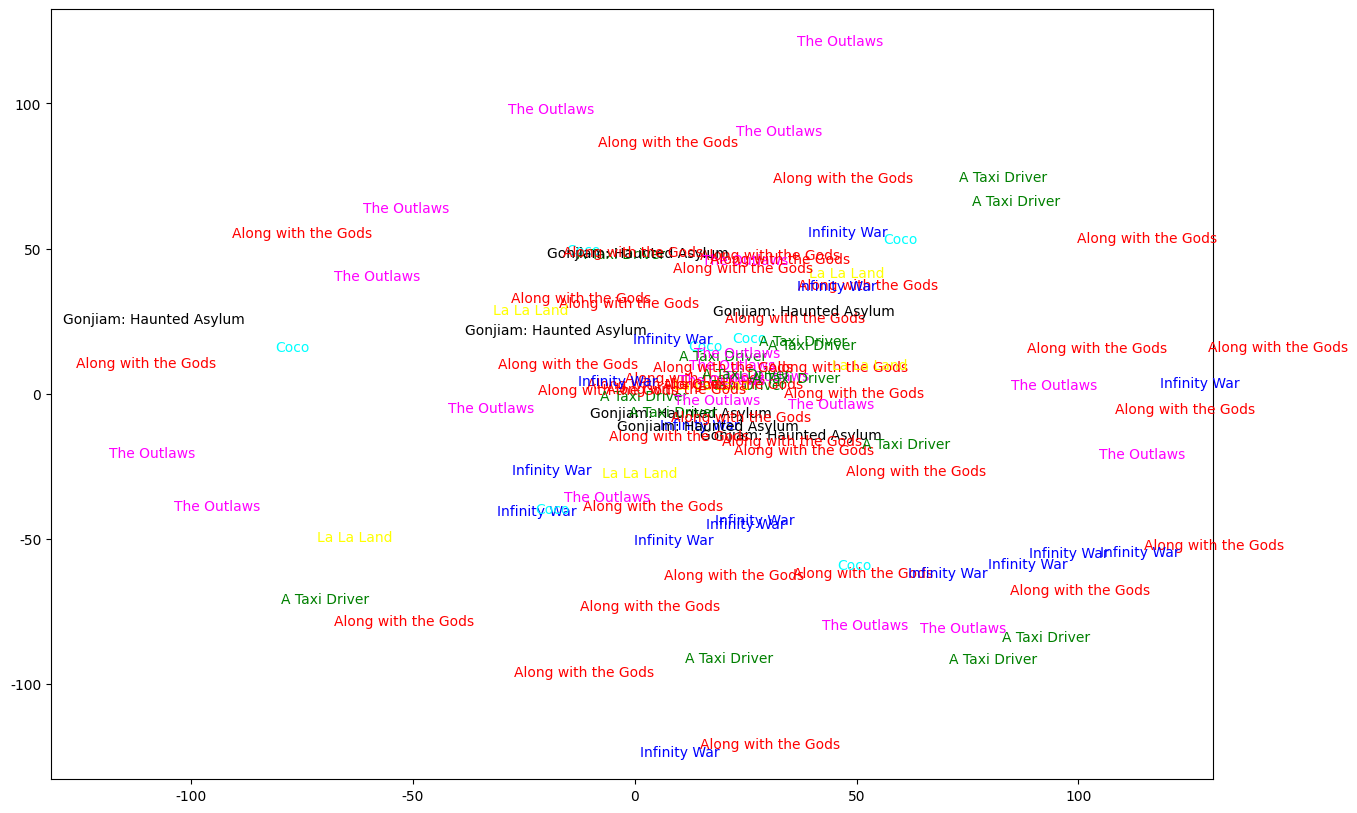

In [30]:
tsne_graph(tsne_tfidf, y_train)

– 결과에 대한 해석:

 데이터의 차원이 t-SNE에 의해 낮아졌음에도 불구하고 영화들 간의 경계가 뚜렷하게 보이지 않습니다. 중심에 많이 몰려 있으므로 영화들이 서로 비슷한 특징을 공유하고 있으며, 특히 "범죄도시"(자주색), "신과함께"(빨간색)은 상당히 넓은 영역에 퍼져 있어 다양한 영화들과 공통점이 있을 가능성이 있습니다. 그리고 "라라랜드"(노란색)와 "택시운전사"(초록색)는 서로 떨어진 위치에 있으므로 서로 크게 다르거나 독특한 특징을 가지고 있을 가능성이 있습니다.

위의 결과를 보면 영화들이 구분없이 고르게 분포했기 때문에 다시한번 결과를 살펴보기 위해 PCA 벡터를 사용해 보았습니다.

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000, random_state=7)

# 훈련 데이터셋에 대해 PCA 모델을 학습합니다.
X_train_pca = pca.fit_transform(X_train_tfidf_k.toarray())

# 테스트 데이터셋에 대해 transform을 호출합니다.
X_test_pca = pca.transform(X_test_tfidf_k.toarray())

# 결과 출력
print('PCA Converted train matrix shape:', X_train_pca.shape)
print('PCA Converted test matrix shape:', X_test_pca.shape)

PCA Converted train matrix shape: (11043, 2000)
PCA Converted test matrix shape: (3682, 2000)


In [32]:
tsne_pca = tsne.fit_transform(X_train_pca)

print('TSNE dimension:', tsne_pca.shape)

TSNE dimension: (11043, 2)


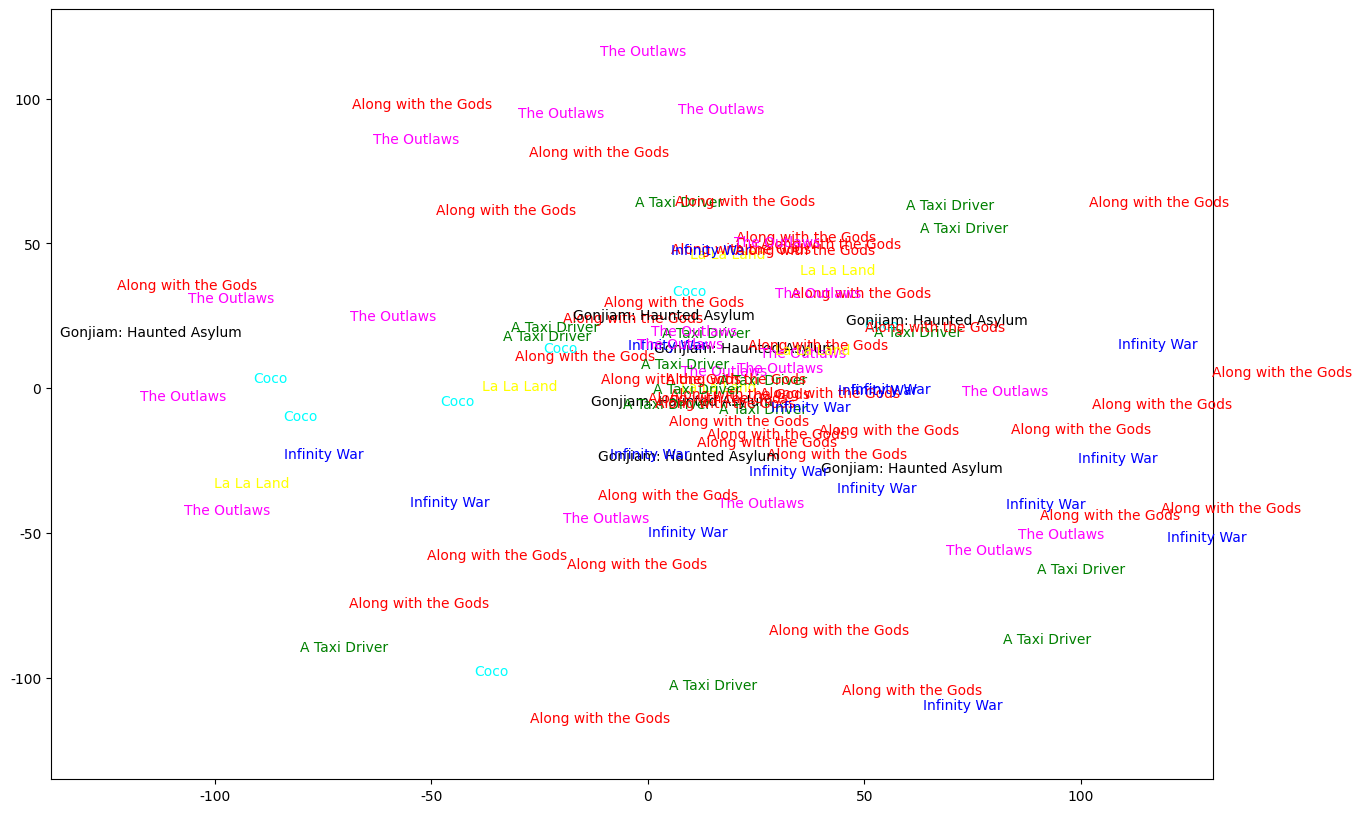

In [33]:
# # PCA로 축소한 벡터를 t-SNE로 시각화한 결과 확인
tsne_graph(tsne_pca, y_train)

– 결과에 대한 해석:

 PCA 벡터를 사용하여 t-SNE로 시각화한 결과도 여러 영화가 중심에 많이 몰려 있으므로 영화들이 서로 비슷한 특징을 공유하고 있는 것을 알 수 있습니다. 그리고 "코코"(하늘색)는 상대적으로 중심에서 떨어져 배치되어 있어 다른 영화들에 비해 구별되는 특성이 있다고 생각합니다.

# **⑥ 전체적인 (②~⑤에 대한) 결론/느낀점(어려웠던 점을 어떻게 해결했는가?, 잘한 점) 작성하기**

과제를 시작하기 전에는 분류기로 로지스틱 회귀, Tokenizer로는 n.nouns를 사용하는 것이 가장 좋은 성능을 낼 것이라 예상했습니다. 그러나 실제로 여러 분류기의 성능을 비교해본 결과, 라쏘 회귀를 분류기로 사용하고, Tokenizer로는 k.morphs, Vectorizer로는 TF-IDF를 사용하는 것이 가장 좋은 성능을 보였습니다. 그리고 t-SNE를 통해 데이터를 시각화한 결과, 영화들 간의 뚜렷한 경계가 보이지 않았습니다. 이로 인해 이전 수업에서 영어 데이터를 사용했을 때보다 분류 정확도가 낮게 나왔다고 생각합니다.

이 과정에서 어려웠던 점은, k.morphs Tokenizer와 TF-IDF Vectorizer로 생성된 벡터를 t-SNE로 시각화했을 때 고르게 분포하는 모습을 보였다는 점입니다. 이를 해결하기 위해 LSA 벡터를 사용하여 다시 시도해보았으나, 벡터를 LSA로 변환하는 과정에서 세션이 반복적으로 다운되는 문제가 발생했습니다. 데이터의 용량이 너무 커서 발생한 문제라고 판단하여 SVD의 n_components 값을 조정하거나 훈련 데이터 대신 테스트 데이터를 사용하는 방법을 시도했으나, 동일한 문제가 계속 반복되었습니다. 결국 LSA 대신 PCA를 사용하여 차원을 축소할 수밖에 없었습니다.

